IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
from numpy import ndarray
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

Converting Image to Numpy array

In [2]:
img = Image.open('dog.jpg')
original_img = np.array(img)
original_img

array([[[ 57,  53,  41],
        [ 60,  56,  44],
        [ 62,  58,  46],
        ...,
        [ 76,  70,  54],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 58,  54,  42],
        [ 59,  55,  43],
        [ 61,  57,  45],
        ...,
        [ 75,  69,  53],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 60,  56,  44],
        [ 58,  54,  42],
        [ 59,  55,  43],
        ...,
        [ 75,  69,  53],
        [ 75,  69,  53],
        [ 76,  70,  54]],

       ...,

       [[ 92,  85,  67],
        [ 93,  86,  68],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 93,  86,  68],
        [ 94,  87,  69],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 89,  82,  64],
        [ 89,  82,  64],
        [ 90,  83,  65],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]

Function to display Images

In [3]:
def display_img(image_array: ndarray, text: str = ''):
    plt.imshow(image_array, cmap='gray')

    if text != '':
        plt.title(text)

    plt.axis('off')
    return

def compare_img(*args):
    """
    Plots the images with the text

    Parameters:
    tuple: (image_array, text)
    (image_array(ndarray): Image array to be plotted
    text: Text to be displayed with the image)
    """
    num = len(args)
    plt.figure(figsize=(10,5*num))
    rows = (num+1)//2

    for i in range(num):
        if len(args[i]) == 2 and type(args[i][-1]) == str:
            image_arr = args[i][0]
            text = args[i][1]
        else:
            image_arr = args[i]
            text = ''

        plt.subplot(rows,2,i+1)
        display_img(image_arr, text)

    plt.tight_layout()
    plt.show()

    return

Cropping Image

<Figure size 1000x500 with 0 Axes>

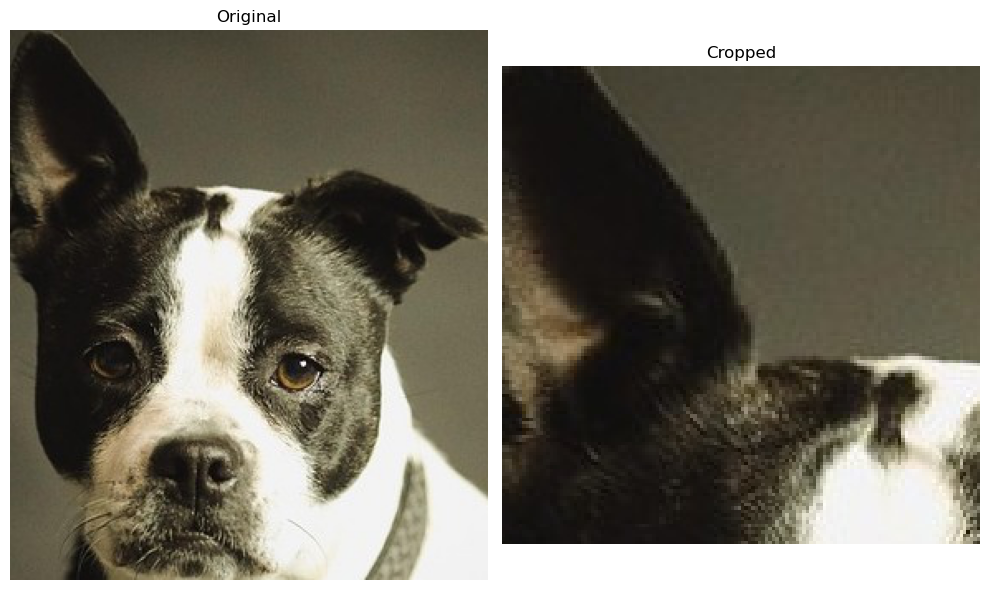

In [4]:
x1, y1 = 10, 10
x2_1, y2_1 = 150, 150
x2_2, y2_2 = 200, 200

cropped_img_1 = original_img[y1:y2_1, x1:x2_1]
cropped_img_2 = original_img[y1:y2_2, x1:x2_2]

plt.figure(figsize=(10, 5))
compare_img((original_img, "Original"), (cropped_img_1, "Cropped"))

Rotate Image

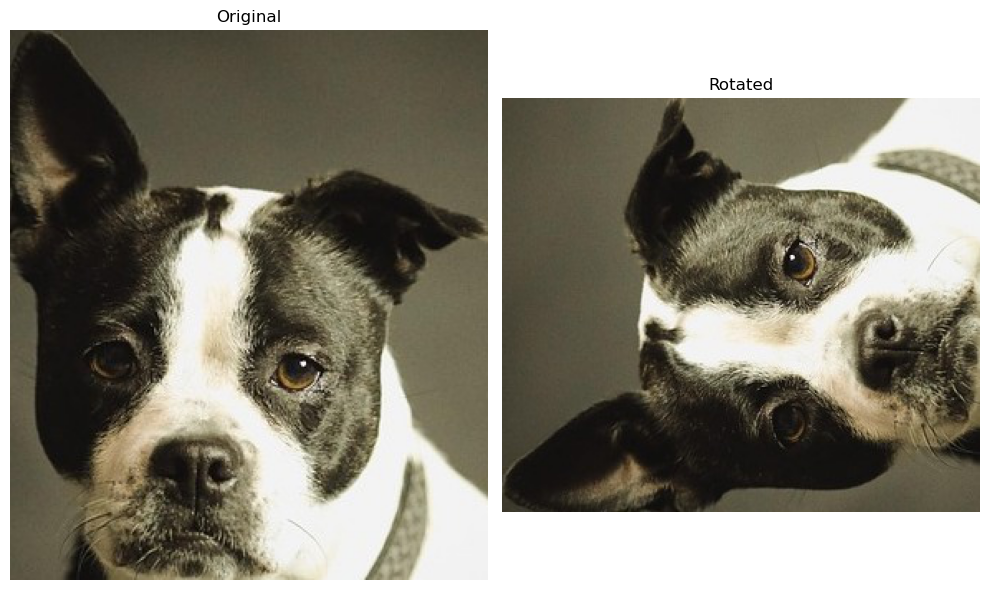

In [5]:
rotated_img = np.rot90(original_img)
compare_img((original_img, "Original"), (rotated_img,"Rotated"))


Flipping Image

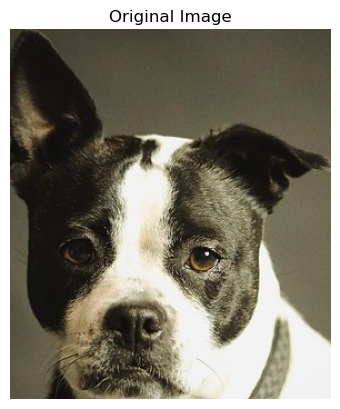

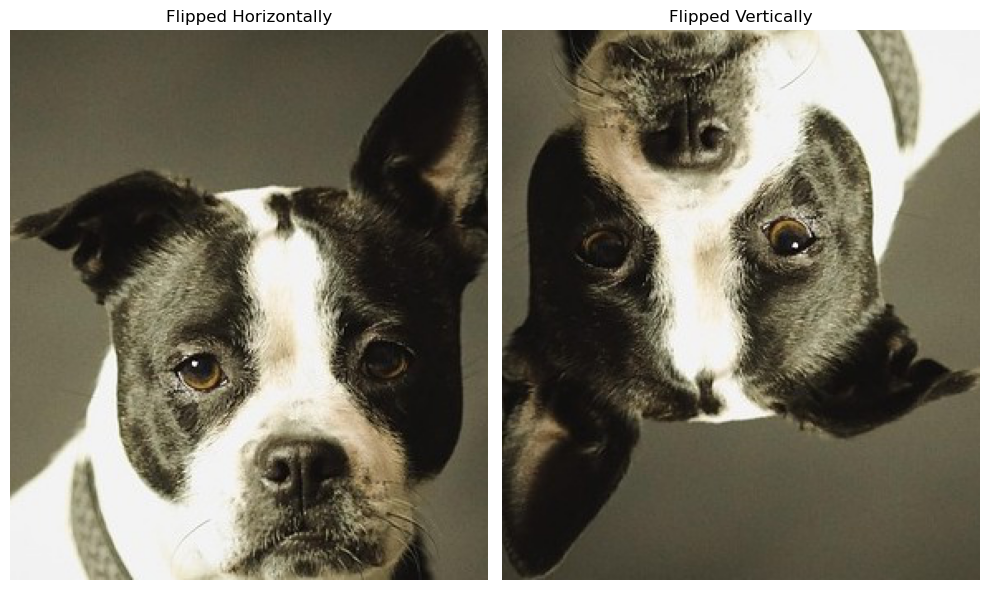

In [6]:
flip_horizontal_img = np.fliplr(original_img)
flip_vertical_img = np.flipud(original_img)

display_img(original_img, "Original Image")
compare_img((flip_horizontal_img, "Flipped Horizontally"), (flip_vertical_img, "Flipped Vertically"))

Negative of Image

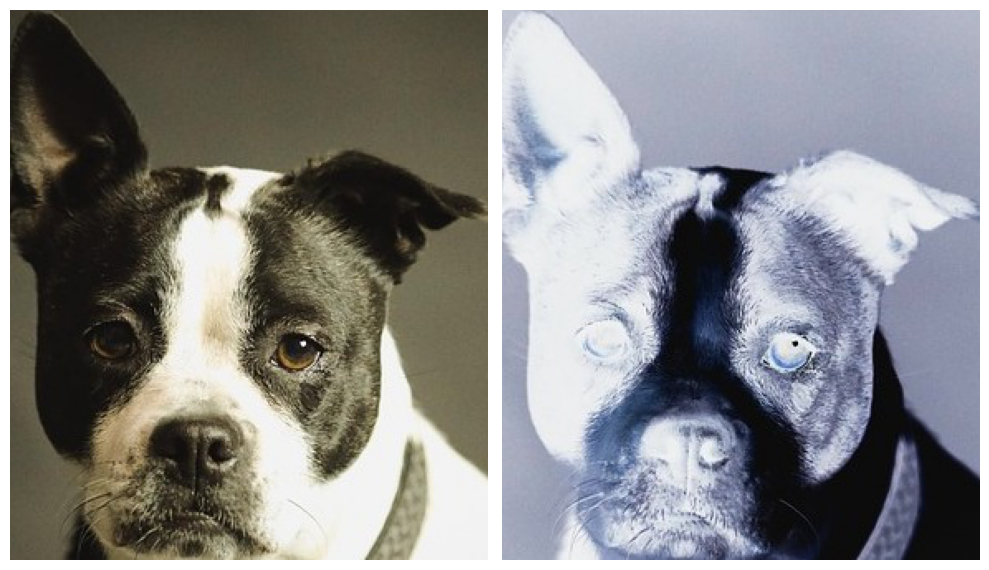

In [7]:
def is_rgb(image_array: ndarray) -> bool:
    if image_array.ndim < 3:
        return False
    else:
        return True

negative_img = 255 - original_img
compare_img(original_img, negative_img)

Binarizing an Image

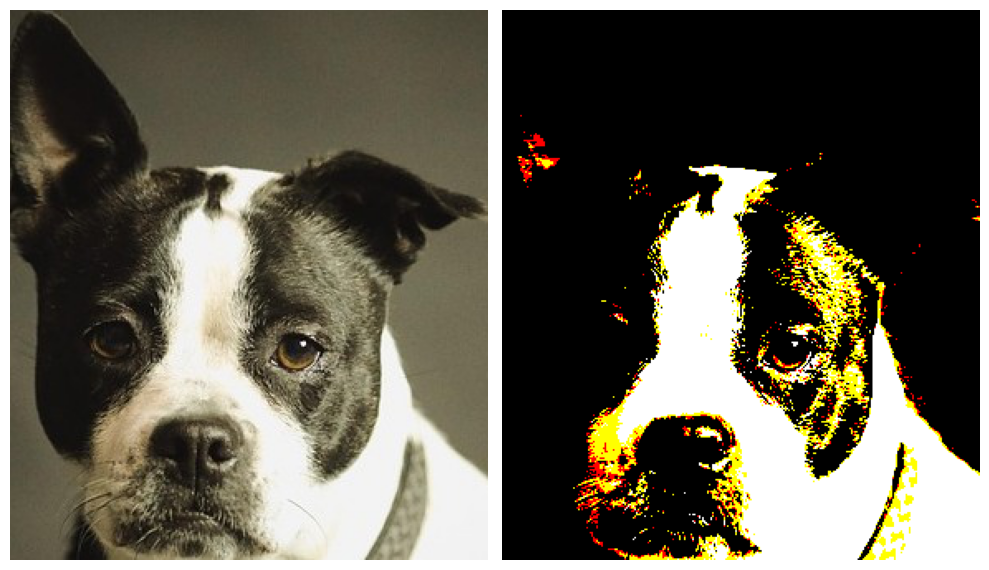

In [8]:
threshold = 128

binarised_img = np.where(original_img < threshold, 0, 255)
compare_img(original_img, binarised_img)

Grayscaling an Image

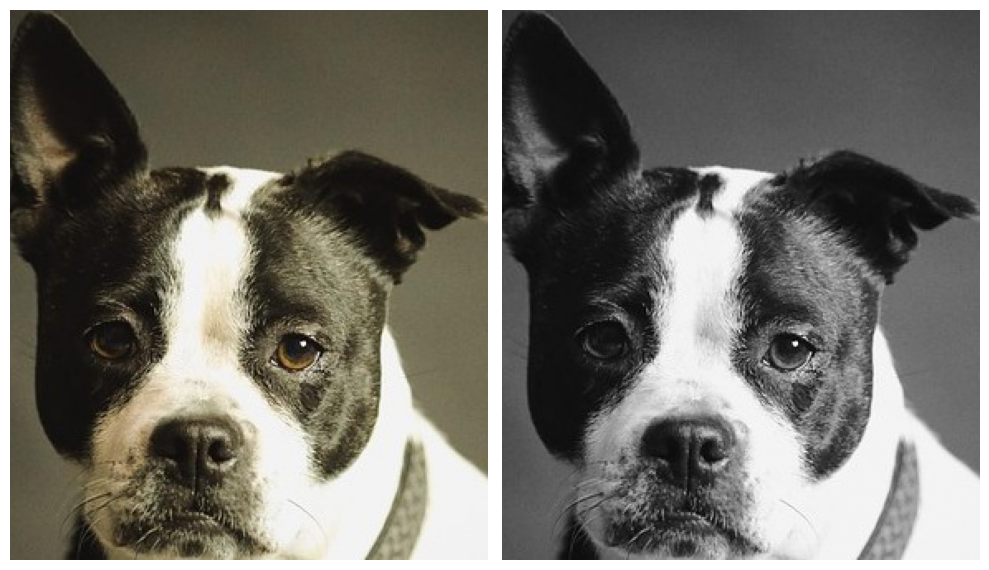

In [9]:
# Grayscale conversion formula: Y = 0.299*R + 0.587*G + 0.114*B
gray_convert_arr = np.array((0.299, 0.587, 0.114))
gray_img = np.dot(original_img, gray_convert_arr)

compare_img(original_img, gray_img)

Convolution

In [ ]:
def convolve2d(image_array: ndarray, kernel: ndarray):
    kernel = np.flipud(np.fliplr(kernel))

    if is_rgb(image_array):
        return "RGB image. Use convolve3d instead"
    else:
        rows, columns = image_array.shape
        krows, kcols = kernel.shape
        padrows, padcols = krows//2, kcols//2

        output = np.zeros_like(image_array)
        padded_img = np.pad(image_array, ((padrows, padrows), (padcols, padcols)), 'constant', constant_values=0)

        for row in range(rows):
            for col in range(columns):
                region = padded_img[row:row+krows, col:col+kcols]
                output[row, col] = np.clip(np.sum(region*kernel), 0, 255)

        return output

def convolve3d(image_array: ndarray, kernel: ndarray):
    dimensions = image_array.ndim

    if dimensions > 3:
        return "Convolution not possible"

    if dimensions == 2:
        return convolve2d(image_array, kernel)
    
    else:
        channels = image_array.shape[-1]
        output = np.zeros_like(image_array)

        for c in range(channels):
            channel = image_array[:,:,c]
            output[:,:,c] = convolve2d(channel, kernel)
        
        return output


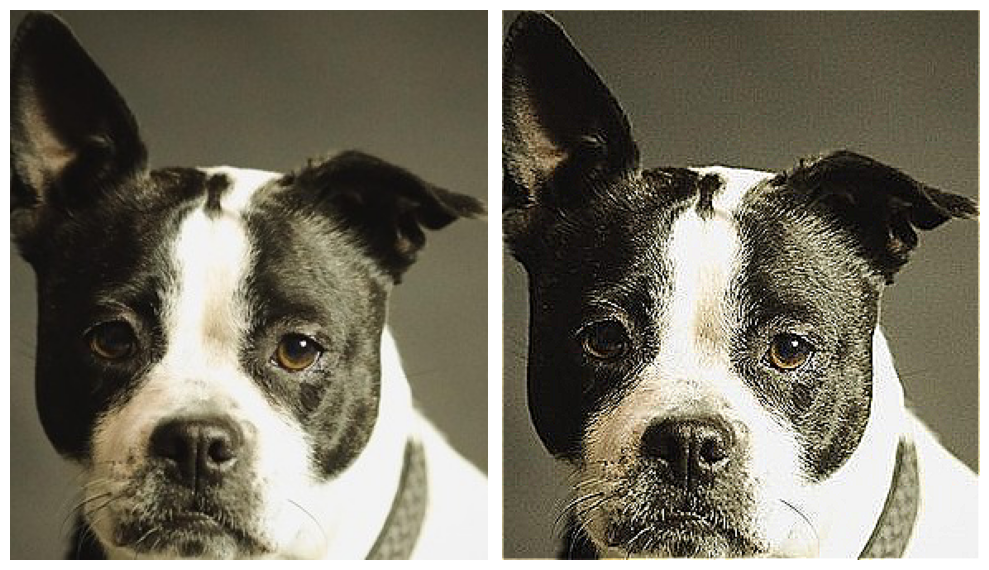

In [87]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpen_img = convolve3d(original_img, sharpen)
compare_img(original_img, sharpen_img)

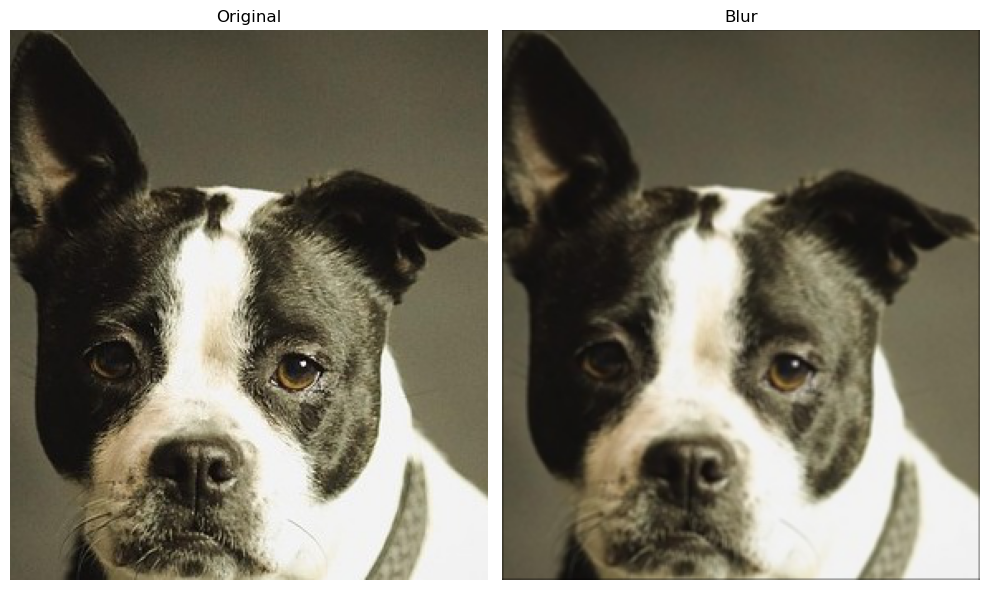

In [89]:
box_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

blur_img = convolve3d(original_img, box_blur)
compare_img((original_img, "Original"), (blur_img, "Blur"))


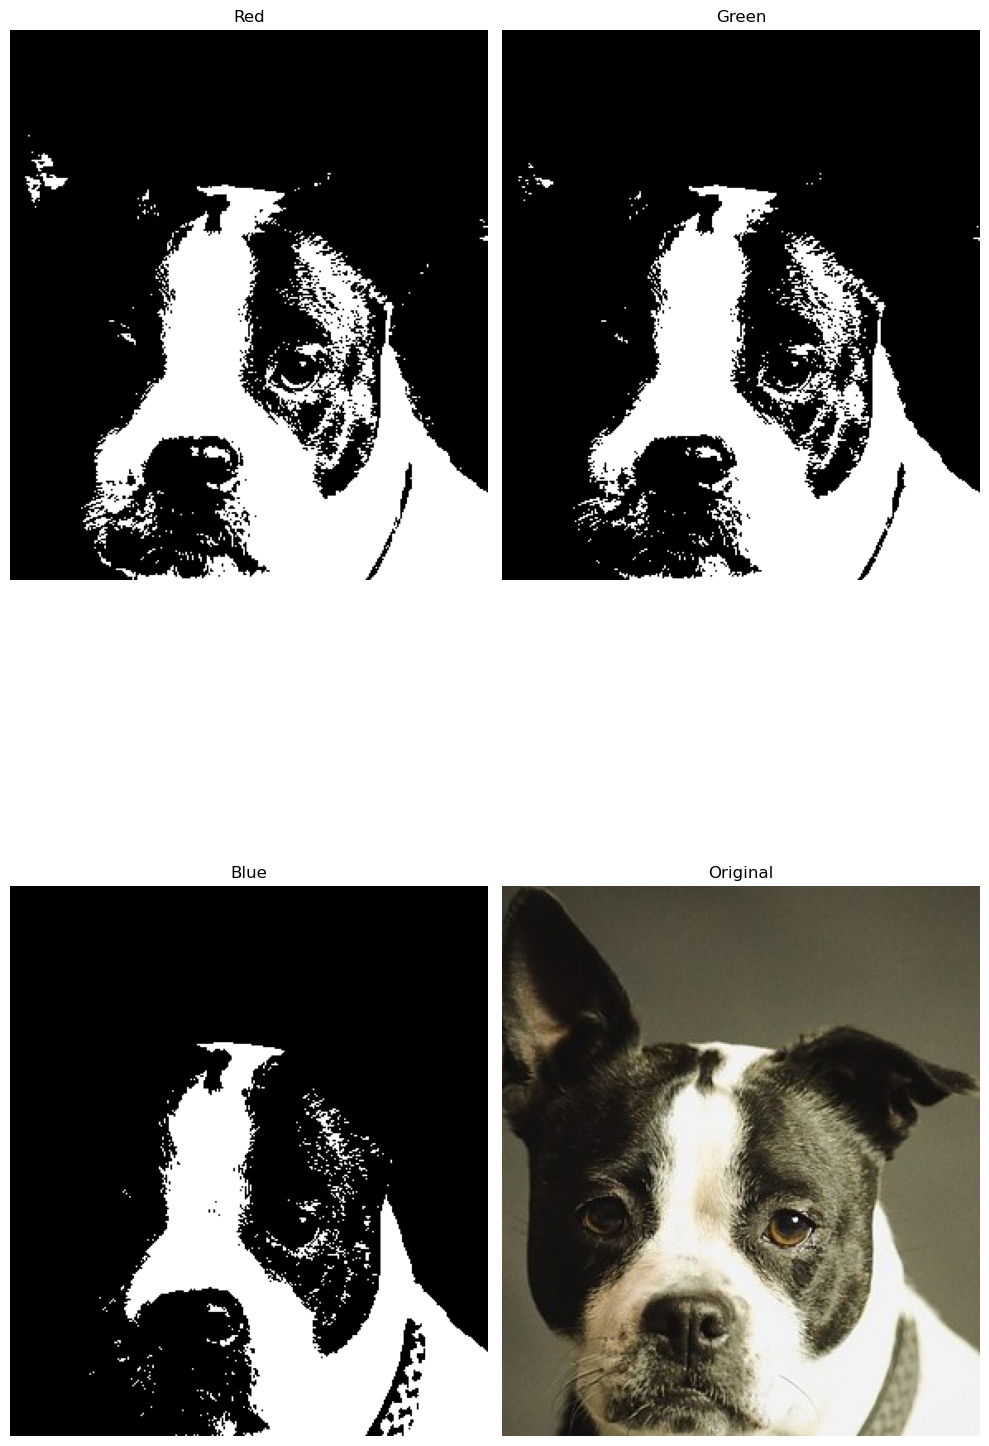

In [ ]:
red_binarised, green_binarised, blue_binarised = binarised_img[:,:,0], binarised_img[:, :, 1], binarised_img[:, :, 2]
compare_img((red_binarised, "Red"), (green_binarised, "Green"), (blue_binarised, "Blue"), (original_img, "Original"))

In [33]:
arr_1 = np.linspace(1, 20, 30).reshape(5,3,2)
print(arr_1)
print(arr_1.shape)
print()

arr_2 = np.linspace(1, 10, 30).reshape(5,3,2)
print(arr_2)
print(arr_2[:,:,0].shape)

print(arr_1[4][0])

[[[ 1.          1.65517241]
  [ 2.31034483  2.96551724]
  [ 3.62068966  4.27586207]]

 [[ 4.93103448  5.5862069 ]
  [ 6.24137931  6.89655172]
  [ 7.55172414  8.20689655]]

 [[ 8.86206897  9.51724138]
  [10.17241379 10.82758621]
  [11.48275862 12.13793103]]

 [[12.79310345 13.44827586]
  [14.10344828 14.75862069]
  [15.4137931  16.06896552]]

 [[16.72413793 17.37931034]
  [18.03448276 18.68965517]
  [19.34482759 20.        ]]]
(5, 3, 2)

[[[ 1.          1.31034483]
  [ 1.62068966  1.93103448]
  [ 2.24137931  2.55172414]]

 [[ 2.86206897  3.17241379]
  [ 3.48275862  3.79310345]
  [ 4.10344828  4.4137931 ]]

 [[ 4.72413793  5.03448276]
  [ 5.34482759  5.65517241]
  [ 5.96551724  6.27586207]]

 [[ 6.5862069   6.89655172]
  [ 7.20689655  7.51724138]
  [ 7.82758621  8.13793103]]

 [[ 8.44827586  8.75862069]
  [ 9.06896552  9.37931034]
  [ 9.68965517 10.        ]]]
(5, 3)
[16.72413793 17.37931034]


Image Creation

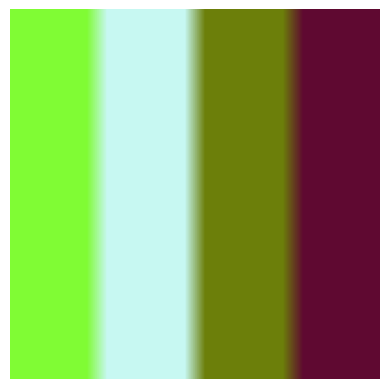

In [71]:
total_px = 200
divisions = 4
count = 3
channels = 3
px_per_merging = 4*count
px_per_division = int((total_px + px_per_merging*(1-divisions))/divisions)
px_per_section = px_per_division + px_per_merging
image = np.zeros(shape=(total_px, total_px, channels))

for i in range(channels):
    section = np.random.randint(0, 255, size=(divisions,)).astype(np.uint8)
    
    for j in range(divisions):
        px = section[j]
        section_img = np.stack([np.repeat(px, px_per_division)]*total_px)

        start = j*px_per_section
        stop = start+px_per_division
        image[:,start:stop,i] = section_img

        if j != divisions-1:
            merge = np.linspace(px, section[j+1], px_per_merging)
            merge_img = np.stack([merge]*total_px)

            start = stop
            stop = start+px_per_merging
            image[:, start:stop, i] = merge_img

display_img(image.astype(np.uint8))

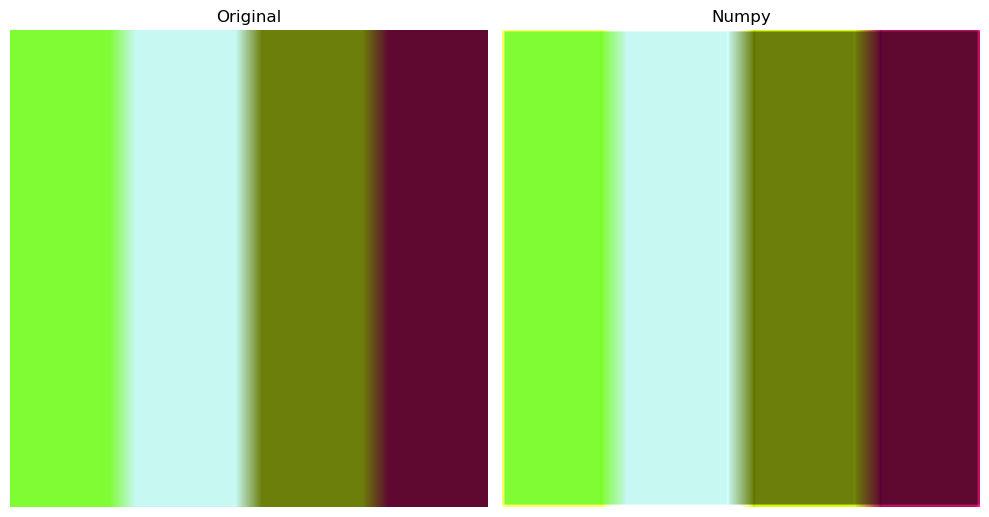

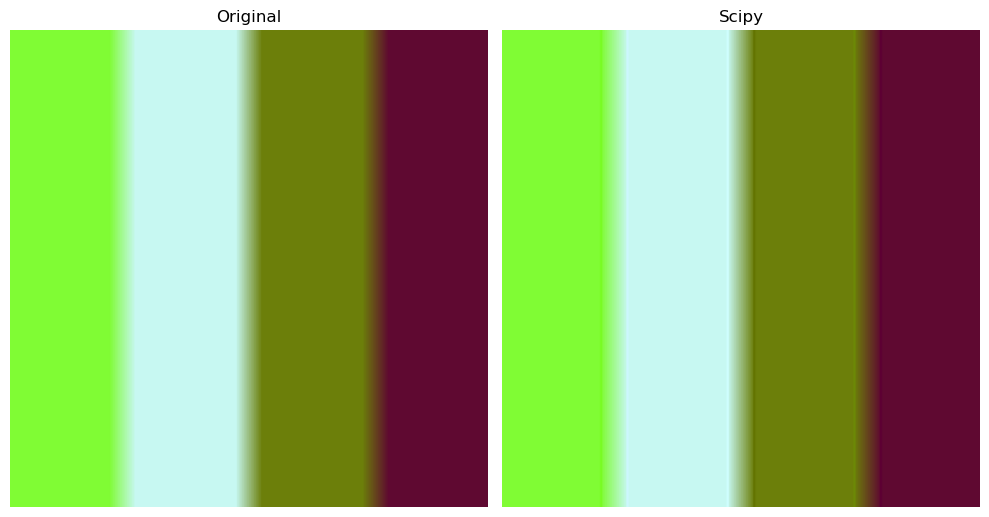

In [85]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], sharpen), 0, 255)

result_np = convolve3d(image, sharpen)

compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

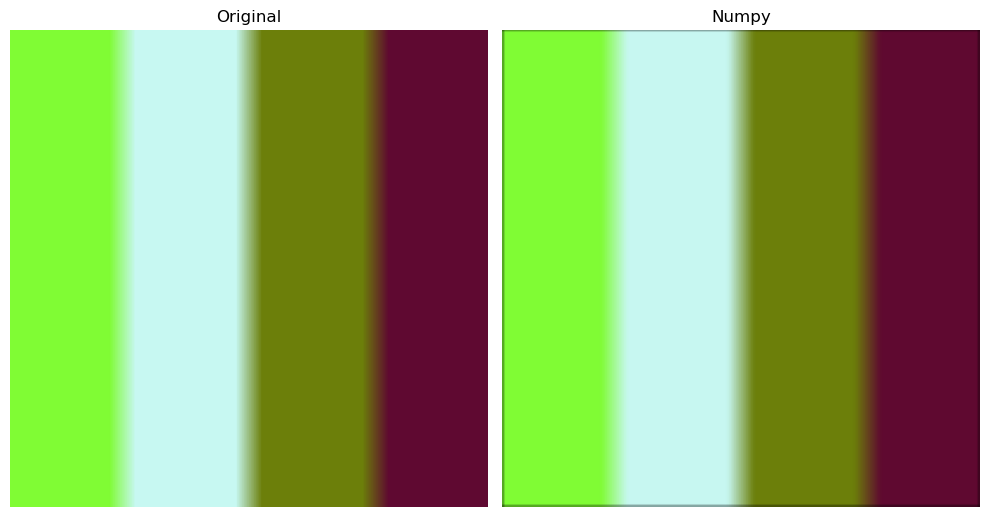

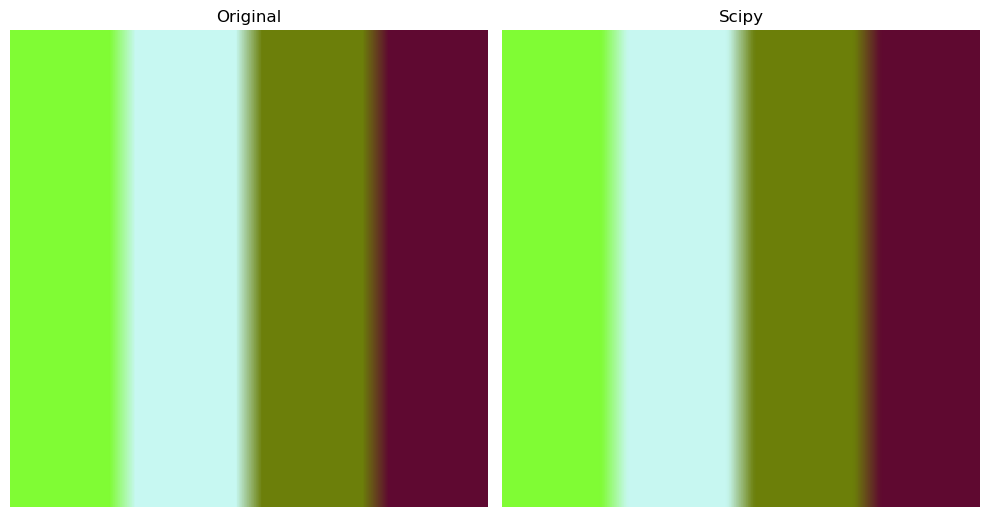

In [ ]:
blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], blur), 0, 255)

result_np = convolve3d(image, blur)

compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

In [56]:
num = 2
arr = np.stack([np.repeat(num, 10)]*10, axis=-1)
arr

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [83]:
rows, columns = 6, 6
stop = 30
arr = np.stack([np.linspace(0,stop,rows)]*columns).astype(np.int8)
arr

array([[ 0,  6, 12, 18, 24, 30],
       [ 0,  6, 12, 18, 24, 30],
       [ 0,  6, 12, 18, 24, 30],
       [ 0,  6, 12, 18, 24, 30],
       [ 0,  6, 12, 18, 24, 30],
       [ 0,  6, 12, 18, 24, 30]], dtype=int8)

In [84]:
result_1 = convolve2d(arr, sharpen)
result_2 = np.clip(convolve(arr, sharpen), 0, 255)

print(result_1)
print()
print(result_2)

[[ 0 12 24 36 48 96]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0  6 12 18 24 66]
 [ 0 12 24 36 48 96]]

[[ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]
 [ 0  6 12 18 24 36]]
